# RECONOCIMIENTO FACIAL

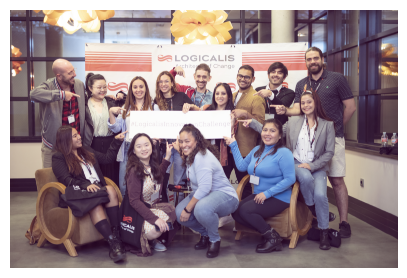

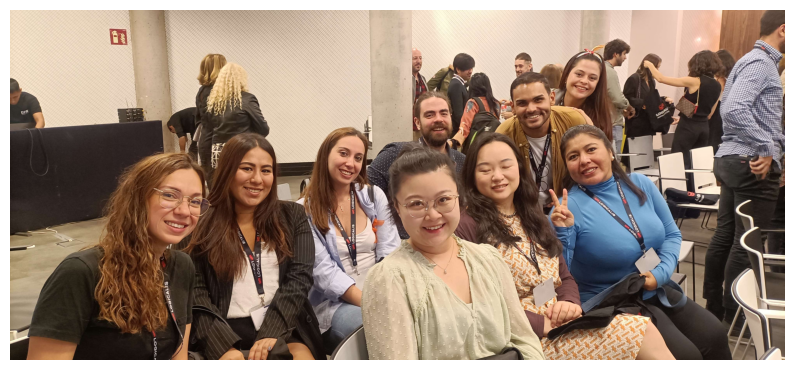

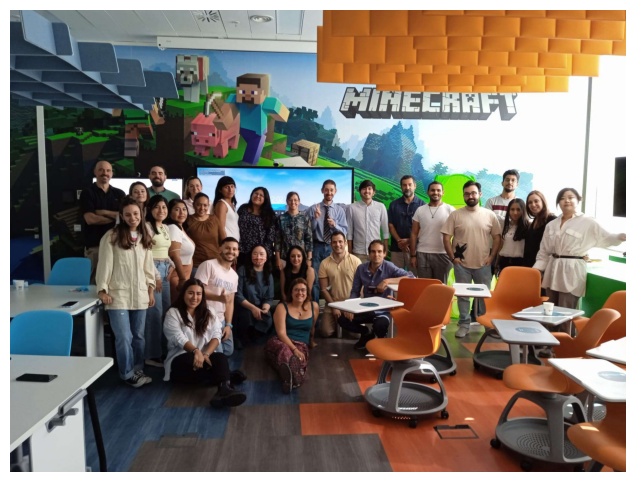

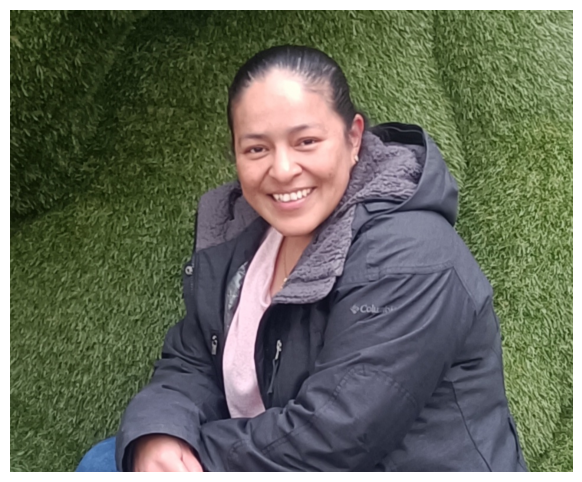

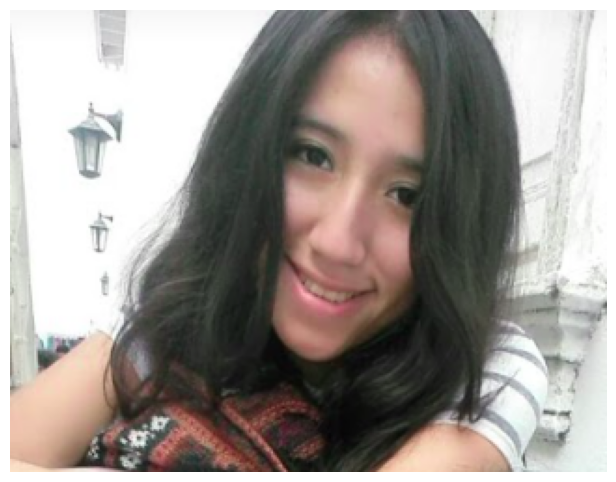

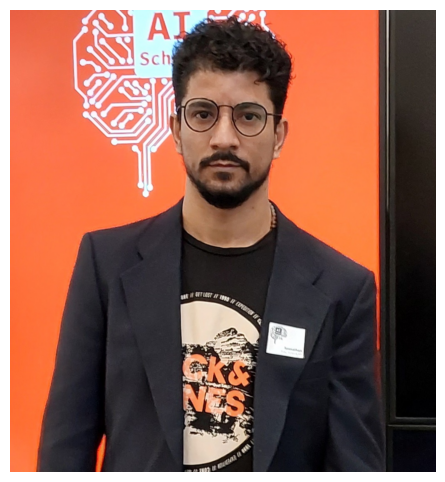

In [7]:
# Lectura de imágenes
# ==============================================================================
from PIL import Image
import cv2
import matplotlib.pyplot as plt

imagen_1 = Image.open('C:/Users/Mayra/PROYF5/Reconocimientofacial/Recofacial/EQUIPO_5_RF/Images/foto1.jpg')
imagen_2 = Image.open('C:/Users/Mayra/PROYF5/Reconocimientofacial/Recofacial/EQUIPO_5_RF/Images/foto_grupal.jpg')
imagen_3 = Image.open('C:/Users/Mayra/PROYF5/Reconocimientofacial/Recofacial/EQUIPO_5_RF/Images/foto_grupal_2.jpg')
imagen_4 = Image.open('C:/Users/Mayra/PROYF5/Reconocimientofacial/Recofacial/EQUIPO_5_RF/Images/mayra.jpg')
imagen_5 = Image.open('C:/Users/Mayra/PROYF5/Reconocimientofacial/Recofacial/EQUIPO_5_RF/Images/andrea.jpg')
imagen_6 = Image.open('C:/Users/Mayra/PROYF5/Reconocimientofacial/Recofacial/EQUIPO_5_RF/Images/jonathan.jpg')


# imagen_1 = cv2.imread('images/imagen_1.jpg')
# imagen_2 = cv2.imread('images/imagen_2.png')

# Representación de imágenes
# ==============================================================================
plt.figure(figsize=(5, 4))
plt.imshow(imagen_1)
plt.axis('off');

plt.figure(figsize=(10, 6))
plt.imshow(imagen_2)
plt.axis('off');

plt.figure(figsize=(10, 6))
plt.imshow(imagen_3)
plt.axis('off');

plt.figure(figsize=(10, 6))
plt.imshow(imagen_4)
plt.axis('off');

plt.figure(figsize=(10, 6))
plt.imshow(imagen_5)
plt.axis('off');

plt.figure(figsize=(10, 6))
plt.imshow(imagen_6)
plt.axis('off');


## DETECTOR DE CARAS MTCNN

In [9]:
import torch
from facenet_pytorch import MTCNN
import numpy as np

# Detectar si se dispone de GPU cuda
# ==============================================================================
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

# Detector MTCNN
# ==============================================================================
mtcnn = MTCNN(
            select_largest = True,
            min_face_size  = 20,
            thresholds     = [0.6, 0.7, 0.7],
            post_process   = False,
            image_size     = 160,
            device         = device
        )

Running on device: cpu


In [10]:
# Detección de bounding box y landmarks
# ==============================================================================
boxes, probs, landmarks = mtcnn.detect(imagen_4, landmarks=True)
print('Bounding boxes:', boxes)
print('Probability:', probs)
print('landmarks:', landmarks)

Bounding boxes: [[375.97623 125.7153  572.283   377.57874]]
Probability: [0.9999958]
landmarks: [[[420.3097  237.43832]
  [504.411   223.55576]
  [460.1933  284.5361 ]
  [431.24225 313.42764]
  [522.47003 299.40762]]]


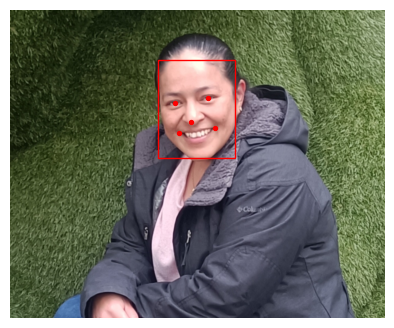

In [12]:
# Representación con matplotlib
# ==============================================================================
# En punto de origen (0,0) de una imagen es la esquina superior izquierda
box = boxes[0]
landmark = landmarks[0]
fig, ax  = plt.subplots(figsize=(5, 4))
ax.imshow(imagen_4)
ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c= 'red')
rect = plt.Rectangle(
            xy     = (box[0], box[1]),
            width  = box[2] - box[0],
            height = box[3] - box[1],
            fill   = False,
            color  = 'red'
       )
ax.add_patch(rect)
ax.axis('off');

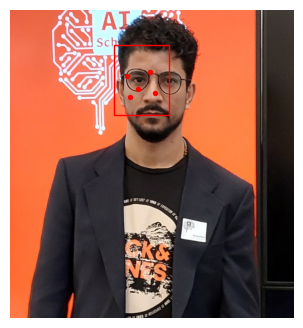

In [16]:
# Representación con matplotlib
# ==============================================================================
# En punto de origen (0,0) de una imagen es la esquina superior izquierda
box = boxes[0]
landmark = landmarks[0]
fig, ax  = plt.subplots(figsize=(5, 4))
ax.imshow(imagen_5)
ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c= 'red')
rect = plt.Rectangle(
            xy     = (box[0], box[1]),
            width  = box[2] - box[0],
            height = box[3] - box[1],
            fill   = False,
            color  = 'red'
       )
ax.add_patch(rect)
ax.axis('off');

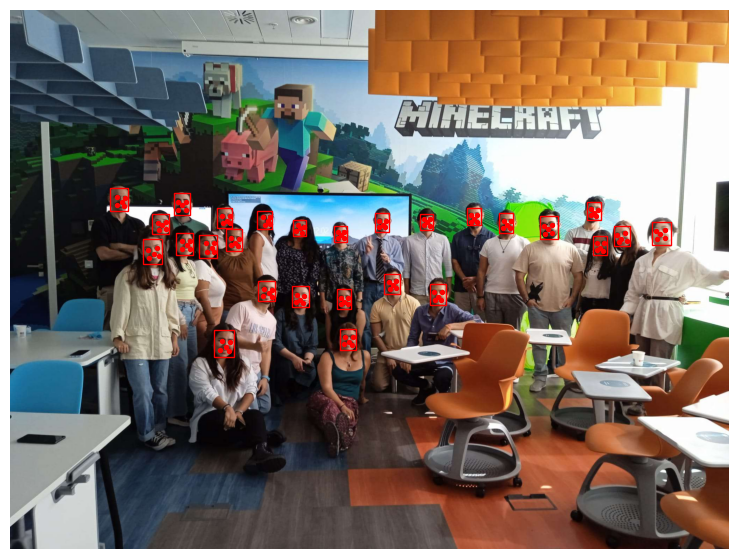

In [19]:
# Detección de bounding box y landmarks
# ==============================================================================
boxes, probs, landmarks = mtcnn.detect(imagen_3, landmarks=True)

# Representación con matplotlib
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 7))
ax.imshow(imagen_3)

for box, landmark in zip(boxes, landmarks):
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c= 'red')
    rect = plt.Rectangle(
                xy     = (box[0], box[1]),
                width  = box[2] - box[0],
                height = box[3] - box[1],
                fill   = False,
                color  = 'red'
           )
    ax.add_patch(rect)

ax.axis('off');


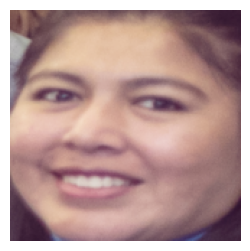

In [23]:
# Detección de cara
# ==============================================================================
# La imagen devuelta por el detector es un tensor con dimensiones [3, 160, 160]
# [canales color, altura, anchura]
# canales color ---> 3 ---> RGB
face = mtcnn.forward(imagen_1)

# Representación con matplotlib
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
face = face.permute(1, 2, 0).int().numpy()
ax.imshow(face)
plt.axis('off');

In [24]:
# Detector MTCNN
# ==============================================================================
mtcnn = MTCNN(
            keep_all      = True,
            min_face_size = 20,
            thresholds    = [0.6, 0.7, 0.7],
            post_process  = False,
            image_size    = 160,
            device        = device
        )

# Detección de caras
# ==============================================================================
faces = mtcnn.forward(imagen_2)

In [25]:
# Las dimensiones del tensor generado son [nº caras, canales color, altura, anchura].
faces.shape

torch.Size([13, 3, 160, 160])

IndexError: index 12 is out of bounds for axis 0 with size 12

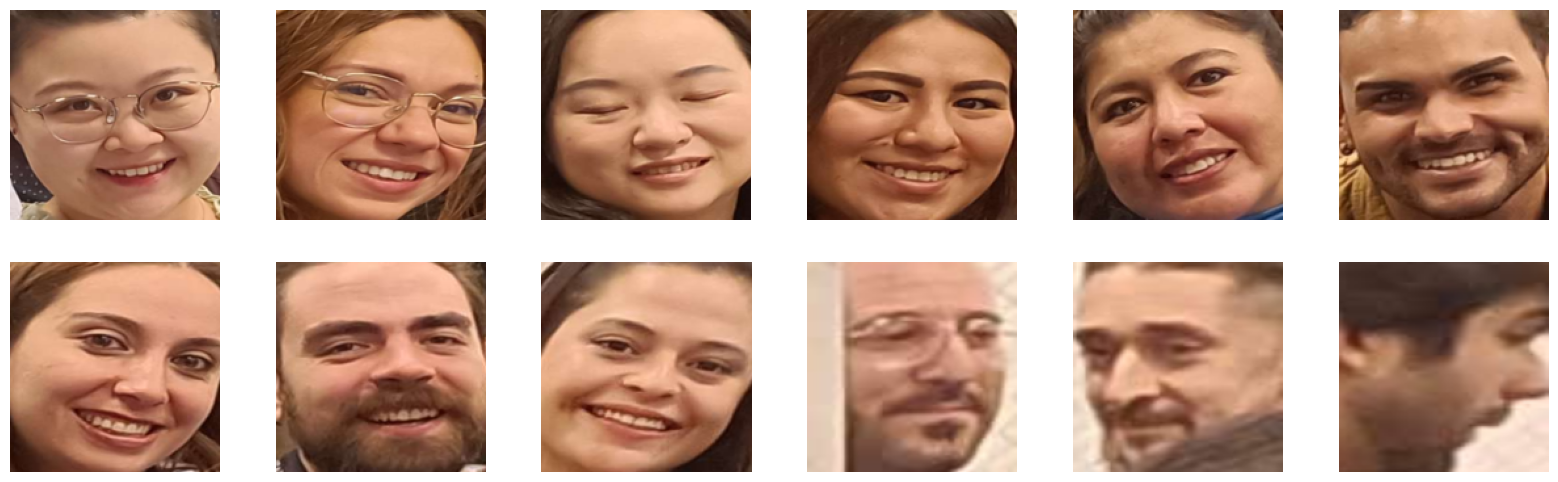

In [29]:
# Representación con matplotlib
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))
axs= axs.flatten()

for i in range(faces.shape[0]):
    face = faces[i,:,:,:].permute(1, 2, 0).int().numpy()
    axs[i].imshow(face)
    axs[i].axis('off')
    
plt.tight_layout();

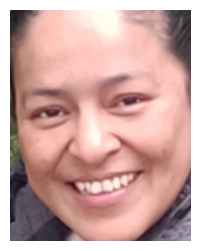

In [31]:
# Extracción de cara a partir de una bounding box
# ==============================================================================
boxes, probs, landmarks = mtcnn.detect(imagen_4, landmarks=True)
x1, y1, x2, y2 = boxes[0].astype(int)
recorte_cara = np.array(imagen_4)[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plt.imshow(recorte_cara)
plt.axis('off');

## EMBEDDING DE ROSTROS

In [32]:
# Modelo para hacer el embedding de las caras
# ==============================================================================
from facenet_pytorch import InceptionResnetV1
encoder = InceptionResnetV1(pretrained='vggface2', classify=False, device=device).eval()

100%|███████████████████████████████████████████████████████████████████████████████| 107M/107M [00:21<00:00, 5.17MB/s]


In [36]:
# Detección de cara
# ==============================================================================
cara = mtcnn(imagen_4)

In [37]:
# Embedding de cara
# ==============================================================================
embedding_cara = encoder.forward(cara.reshape((1,3, 160, 160))).detach().cpu()
embedding_cara

tensor([[ 4.7206e-02, -4.5465e-04,  4.1701e-02,  2.3229e-02,  5.2869e-02,
         -2.2150e-02, -1.2920e-02, -5.5038e-03, -1.4962e-02, -4.0383e-02,
         -9.5415e-02, -3.0393e-03, -8.6755e-02, -1.0727e-02,  7.5798e-02,
         -5.6228e-02,  3.4929e-03, -3.3359e-02,  3.0897e-02,  1.0904e-02,
          9.5353e-03,  2.8336e-02, -3.8334e-02,  1.8576e-02,  3.7516e-02,
         -5.0412e-03,  1.1346e-01,  4.7569e-04,  2.3496e-02, -7.7969e-02,
          4.2136e-03,  4.8021e-02,  2.6187e-02,  2.1992e-02,  3.0383e-02,
          7.5901e-03, -6.8348e-02,  3.8710e-02, -4.1162e-02,  2.4053e-02,
          8.1191e-03,  8.7295e-03,  3.3031e-03, -1.0266e-01, -7.8911e-03,
         -5.8271e-02,  3.7335e-02, -9.5591e-03, -4.7165e-02,  1.4687e-02,
          1.0311e-01,  6.8478e-02,  6.9064e-02,  5.8698e-02,  8.3315e-03,
         -2.9197e-02,  3.5837e-02,  8.1145e-02,  1.4003e-02,  1.8489e-02,
         -2.1035e-02, -7.1790e-02,  8.2448e-02, -4.7828e-02,  3.4203e-02,
          5.1540e-02,  2.3436e-02,  1.

## SIMILITUD ENTRE ROSTROS

In [38]:
# Detector MTCNN
# ==============================================================================
mtcnn = MTCNN(
            keep_all      = True,
            min_face_size = 20,
            thresholds    = [0.6, 0.7, 0.7],
            post_process  = False,
            image_size    = 160,
            device        = device
        )

In [46]:
# Extracción de las caras MTCNN
# ==============================================================================
PRUEBA_2 = mtcnn(imagen_4)[0]
PRUEBA_1= mtcnn(imagen_1)[2]
RECO = mtcnn(imagen_1)[1]

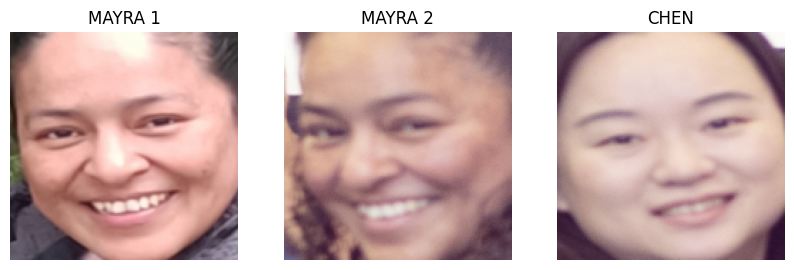

In [49]:
# Representación con matplotlib
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

face = PRUEBA_2.permute(1, 2, 0).int().numpy()
axs[0].imshow(face)
axs[0].set_title('MAYRA 1')
axs[0].axis('off')

face = PRUEBA_1.permute(1, 2, 0).int().numpy()
axs[1].imshow(face)
axs[1].set_title('MAYRA 2')
axs[1].axis('off')

face = RECO.permute(1, 2, 0).int().numpy()
axs[2].imshow(face)
axs[2].set_title('CHEN')
axs[2].axis('off');

In [ ]:
# Embeddings
# ==============================================================================
embeding_PRUEBA_2 = encoder.forward(PRUEBA_2.reshape((1,3, 160, 160))).detach().cpu()
embeding_PRUEBA_1 = encoder.forward(PRUEBA_1.reshape((1,3, 160, 160))).detach().cpu()
embeding_RECO = encoder.forward(RECO.reshape((1,3, 160, 160))).detach().cpu()

In [59]:
embeding_PRUEBA_2

tensor([[ 4.7206e-02, -4.5465e-04,  4.1701e-02,  2.3229e-02,  5.2869e-02,
         -2.2150e-02, -1.2920e-02, -5.5038e-03, -1.4962e-02, -4.0383e-02,
         -9.5415e-02, -3.0393e-03, -8.6755e-02, -1.0727e-02,  7.5798e-02,
         -5.6228e-02,  3.4929e-03, -3.3359e-02,  3.0897e-02,  1.0904e-02,
          9.5353e-03,  2.8336e-02, -3.8334e-02,  1.8576e-02,  3.7516e-02,
         -5.0412e-03,  1.1346e-01,  4.7569e-04,  2.3496e-02, -7.7969e-02,
          4.2136e-03,  4.8021e-02,  2.6187e-02,  2.1992e-02,  3.0383e-02,
          7.5901e-03, -6.8348e-02,  3.8710e-02, -4.1162e-02,  2.4053e-02,
          8.1191e-03,  8.7295e-03,  3.3031e-03, -1.0266e-01, -7.8911e-03,
         -5.8271e-02,  3.7335e-02, -9.5591e-03, -4.7165e-02,  1.4687e-02,
          1.0311e-01,  6.8478e-02,  6.9064e-02,  5.8698e-02,  8.3315e-03,
         -2.9197e-02,  3.5837e-02,  8.1145e-02,  1.4003e-02,  1.8489e-02,
         -2.1035e-02, -7.1790e-02,  8.2448e-02, -4.7828e-02,  3.4203e-02,
          5.1540e-02,  2.3436e-02,  1.

In [58]:
# Distancias entre embeddings de caras
# ==============================================================================
from scipy.spatial.distance import euclidean
print(f"Distancia entre la misma imagen MAYRA: {euclidean(embeding_PRUEBA_2, embeding_PRUEBA_2)}")
print(f"Distancia entre las dos imágenes de MAYRA: {euclidean(embeding_PRUEBA_2, embeding_PRUEBA_1)}")
print(f"Distancia entre MAYRA y CHEN: {euclidean(embeding_PRUEBA_2, embeding_RECO)}")

ValueError: Input vector should be 1-D.